In [11]:
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,BatchNormalization
from tensorflow.keras.datasets import mnist

import tensorflow.keras.backend as K

In [12]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [13]:
#Now we will se our dataset

print("Dimension of x_train",x_train.shape)
print("Dimension of x_test",x_test.shape)
print("Dimension of y_test",y_test.shape)

Dimension of x_train (60000, 28, 28)
Dimension of x_test (10000, 28, 28)
Dimension of y_test (10000,)


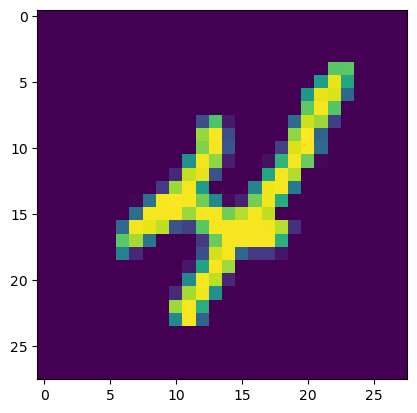

4


In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(x_train[9])
plt.show()
print(y_train[9])

In [15]:
num_classes = 10
#as we have 10 classes (0-9) 
#we need to prdeict one out of 10 which has high probability
epochs = 30
img_rows = 28 
img_cols = 28
#as each image is 28 by 28 pixel

In [16]:
x_train =x_train.astype(float)
x_train =x_train/255
x_test =x_test.astype(float)
x_test =x_test/255
#y_train =y_train/255
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10, dtype = 'float32')
y_test = to_categorical(y_test, num_classes = 10, dtype = 'float32')

In [17]:
#format in which image are feed to our model 
#there are two cases possible either we can have channel first than image dimension
#or we can have dimension first than channel 
#we have one channel as it is a grey scale image therfore '1'
if K.image_data_format() =='channels_first':
    x_train = x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
    x_test = x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
    input_shape = (1,img_rows,img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
    x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
    input_shape = (img_rows,img_cols,1)

In [18]:
#BY DEFAULT STRIDE IS 1
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = input_shape))
model.add(MaxPooling2D())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 units for 10 classes

model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size= 1579, epochs=epochs, validation_data=(x_test, y_test))



Epoch 1/30
28/38 [=====================>........] - ETA: 3s - loss: 1.6494 - accuracy: 0.4155

KeyboardInterrupt: 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 batch_normalization (Batch  (None, 11, 11, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 batch_normalization_1 (Bat  (None, 6, 6, 32)          1

In [ ]:
score ,acc = model.evaluate(x_test,y_test)
print("Score is :",score)
print("Accuracy :",acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0294 - accuracy: 0.9927
Score is : 0.02942829206585884
Accuracy : 0.9926999807357788


In [ ]:
import tensorflow as tf

# Assuming you have a pre-trained Keras model
# model = ...

# Save the model architecture to a JSON file
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to an HDF5 file
model.save_weights("model_weights.h5")

# Optionally, if you want to save the entire model (architecture + weights) to a single HDF5 file:
# model.save("full_model.h5")


NameError: name 'model' is not defined

In [ ]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model,'')

c:\Users\kvtha\anaconda3\Lib\site-packages\tensorflowjs\read_weights.py:28: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.uint8, np.uint16, np.object, np.bool]


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model,r'C:\Users\kvtha\Downloads\MNIST\templates')

c:\Users\kvtha\anaconda3\Lib\site-packages\tensorflowjs\read_weights.py:28: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.uint8, np.uint16, np.object, np.bool]


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations